In [4]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Data/M2SLMoneyStock.csv', index_col=0, parse_dates=True)
df.index.freq = 'MS'

In [6]:
sp = pd.read_csv('Data/PCEPersonalSpending.csv', index_col=0, parse_dates=True)
sp.index.freq = 'MS'

In [7]:
df.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [8]:
sp.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [53]:
df = df.join(sp)

In [54]:
df

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1
1995-06-01,3548.9,4977.5
1995-07-01,3567.4,4970.2
1995-08-01,3589.0,5005.3
1995-09-01,3602.1,5020.5


In [55]:
df_join = df_join.dropna()

In [56]:
df.shape

(252, 2)

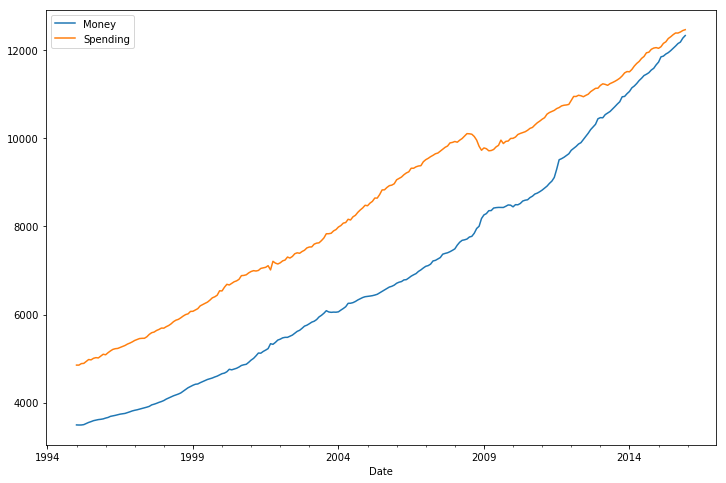

In [57]:
df.plot(figsize=(12,8))

In [58]:
# Test for stationarity
def adf_test(series,title=''):
    from statsmodels.tsa.stattools import adfuller
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [59]:
adf_test(df['Money'])

Augmented Dickey-Fuller Test: 
ADF test statistic        4.239022
p-value                   1.000000
# lags used               4.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [60]:
adf_test(df['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.149796
p-value                   0.969301
# lags used               3.000000
# observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [17]:
# Neither time series is stationary


In [61]:
# Difference on entire data frame
df_trans = df.diff()

In [62]:
adf_test(df_trans['Spending'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -7.226974e+00
p-value                 2.041027e-10
# lags used             2.000000e+00
# observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [63]:
df_trans2 = df_trans.diff(1).dropna()

In [64]:
df_trans2

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7
1995-08-01,3.1,42.4
1995-09-01,-8.5,-19.9
1995-10-01,-1.8,-21.8
1995-11-01,-4.8,48.3


In [65]:
# Do train and test split
nobs = 12
train = df_trans2[:-nobs]
test = df_trans2[-nobs:]

In [66]:
# GRID SEARCH FOR ORDER pAR of VAR model

In [67]:
model = VAR(train)

for p in range(8):
    results = model.fit(p)
    print(f'Order {p}')
    print(f'AIC: {results.aic}')
    print('\n')



Order 0
AIC: 14.747109218090452


Order 1
AIC: 14.178610495220896


Order 2
AIC: 13.955189367163705


Order 3
AIC: 13.849518291541038


Order 4
AIC: 13.827950574458281


Order 5
AIC: 13.78730034460964


Order 6
AIC: 13.799076756885809


Order 7
AIC: 13.797638727913972




In [68]:
results = model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 12, May, 2021
Time:                     20:24:31
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

In [69]:
# Grab 5 lagged values before test set starts
# Numpy array

lagged_values = train.values[-5:]

In [70]:
z = results.forecast(y=lagged_values, steps=12)

In [71]:
z

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

In [72]:
# Transform back to data frame

idx = pd.date_range('2015-01-01', periods=12, freq='MS')
df_forecast = pd.DataFrame(data=z, index=idx, columns=['Money_2d', 'Spending_2d'])

In [73]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money_2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money1d'].cumsum()


In [74]:
df_forecast

,Money_2d,Spending_2d,Money1d,MoneyForecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371
2015-04-01,-2.602233,5.479458,55.450728,11903.639099
2015-05-01,4.228557,-2.443365,59.679285,11963.318384
2015-06-01,1.559393,0.387639,61.238678,12024.557062
2015-07-01,-0.998410,3.883680,60.240268,12084.797331
2015-08-01,0.364510,-2.356101,60.604779,12145.402109
2015-09-01,-1.210627,-1.224147,59.394151,12204.796261
2015-10-01,0.225877,0.786927,59.620028,12264.416289


In [75]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending_2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending1d'].cumsum()

In [76]:
df_forecast.head()

,Money_2d,Spending_2d,Money1d,MoneyForecast,Spending1d,SpendingForecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410,35.299522,12144.049342
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371,28.614552,12172.663894
2015-04-01,-2.602233,5.479458,55.450728,11903.639099,34.094010,12206.757904
2015-05-01,4.228557,-2.443365,59.679285,11963.318384,31.650645,12238.408549


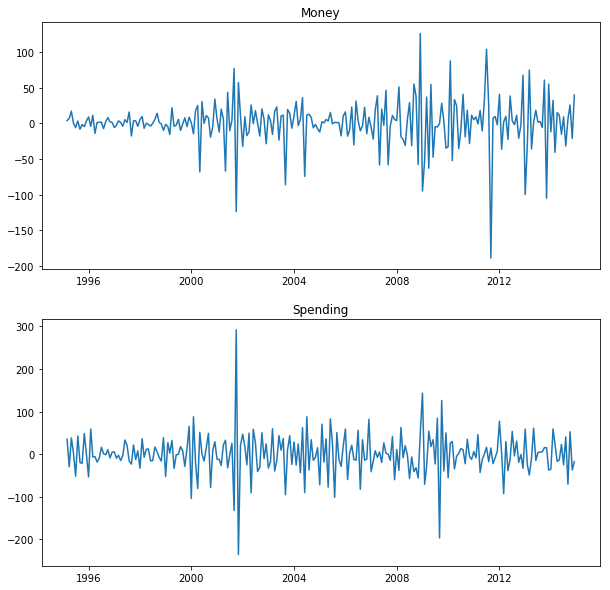

In [77]:
results.plot();

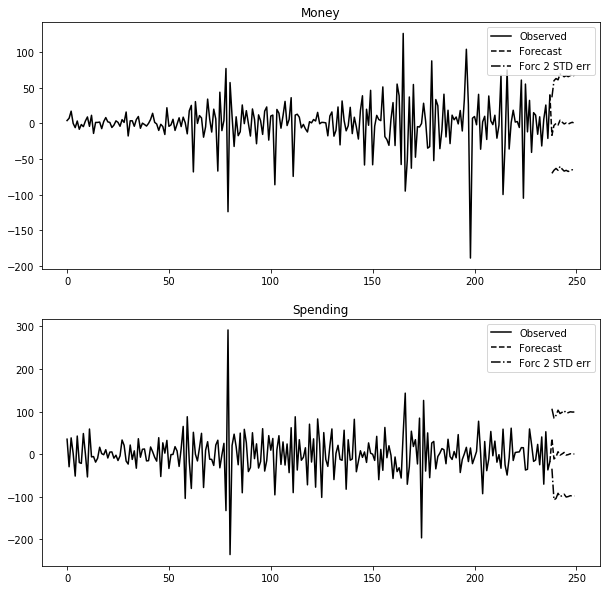

In [78]:
results.plot_forecast(12);

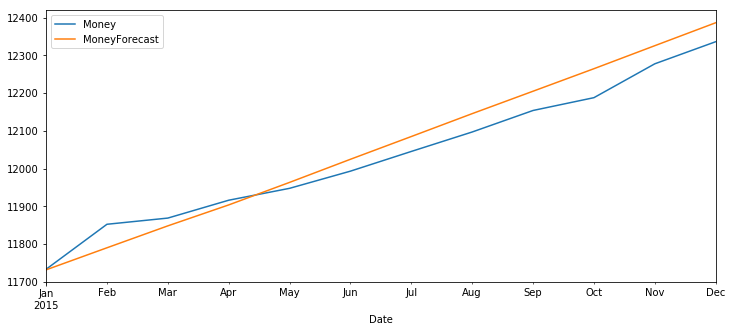

In [79]:
df['Money'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['MoneyForecast'].plot(legend=True);

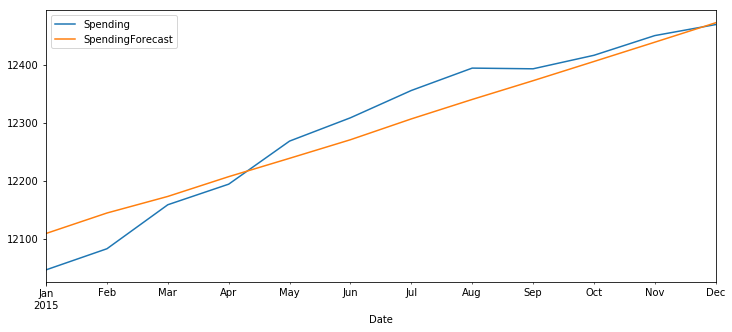

In [80]:
df['Spending'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['SpendingForecast'].plot(legend=True);

In [81]:
#Evaluate the model
RMSE1 = rmse(df['Money'][-nobs:], df_forecast['MoneyForecast'])
print(f'Money VAR(5) RMSE: {RMSE1:.3f}')

Money VAR(5) RMSE: 43.710


In [82]:
RMSE2 = rmse(df['Spending'][-nobs:], df_forecast['SpendingForecast'])
print(f'Spending VAR(5) RMSE: {RMSE2:.3f}')

Spending VAR(5) RMSE: 37.001


In [83]:
from statsmodels.tsa.ar_model import AR,ARResults

In [84]:
modelM = AR(train['Money'])
AR5fit1 = modelM.fit(maxlag=5,method='mle')
print(f'Lag: {AR5fit1.k_ar}')
print(f'Coefficients:\n{AR5fit1.params}')

Lag: 5
Coefficients:
const       0.585195
L1.Money   -0.605217
L2.Money   -0.465398
L3.Money   -0.228645
L4.Money   -0.311355
L5.Money   -0.127614
dtype: float64
